<a href="https://colab.research.google.com/github/AbhishekGit23/ECommerce-Womens-Clothing-Predication/blob/main/Ecommerce_Customer_Prediction_using_Linear_Regression_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is a Starter Notebook for Ecommerce Customers for Predicting yearly amound spend using Linear Regression


### About the Dataset -
The dataset has around 8 features with 499 entries which includes details of customer in ecommerce website. The features may includes : Email, Address, Avatar, Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent.

All of these features have something to offer for predicting and finding the relation betweens the features. Some gives us the idea about the interest of the customer while some gives us the idea for predictions.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

### Loading data

I will be using Ecommerce Customer Data for this notebook

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce.csv')

In [3]:
# first 5 rows of data
df.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Title,Review Text
0,0,767,33.0,4,1,0,Initmates,Intimate,Intimates,34.49726773,12.655651,39.577668,4.082621,587.951054,NaN,Absolutely wonderful - silky and sexy and comf...
1,1,1080,34.0,5,1,4,General,Dresses,Dresses,31.92627203,11.109461,37.268959,2.664034,392.204933,NaN,Love this dress! it's sooo pretty. i happene...
2,2,1077,60.0,3,0,0,General,Dresses,Dresses,33.00091476,11.330278,37.110597,4.104543,487.547505,Some major design flaws,I had such high hopes for this dress and reall...
3,3,1049,50.0,5,1,0,General Petite,Bottoms,Pants,34.30555663,13.717514,36.721283,3.120179,581.852344,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,847,47.0,5,1,6,General,Tops,Blouses,33.33067252,12.795189,37.536653,4.446308,599.406092,Flattering shirt,This shirt is very flattering to all due to th...


In [4]:
# last 5 rows of the data
df.tail()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Title,Review Text
5290,5290,783,37.0,5,1,0,Initmates,Intimate,Sleep,33.50308726,12.877984,37.441021,1.559152,419.938775,Pajama time,"This pants are very comfortable, and add a lit..."
5291,5291,1020,38.0,2,1,1,General,Bottoms,Skirts,31.53160448,13.378563,38.734006,2.245148,436.515606,Recommend with reservations,This a great skirt for someone with a straight...
5292,5292,1020,25.0,4,1,0,General,Bottoms,Skirts,32.90325097,11.657576,36.772604,3.919302,519.340989,Great quality skirt!,"I've been wanting a higher-waisted, button-fro..."
5293,5293,867,70.0,5,1,2,General Petite,Tops,Knits,34.507551,12.893669,37.635756,5.705154,700.917092,Comfort & style in one great top!,"The design is loose and forgiving, and it is v..."
5294,5294,1020,39.0,3,1,2,General,Bottoms,Skirts,33.02933195,11.765813,37.738525,2.721736,423.179992,Small,Tried this on in store and it runs very small....


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5295 non-null   int64  
 1   Clothing ID              5295 non-null   int64  
 2   Age                      5054 non-null   float64
 3   Rating                   5295 non-null   int64  
 4   Recommended IND          5295 non-null   int64  
 5   Positive Feedback Count  5295 non-null   int64  
 6   Division Name            5295 non-null   object 
 7   Department Name          5295 non-null   object 
 8   Class Name               5295 non-null   object 
 9   Avg. Session Length      5295 non-null   object 
 10  Time on App              5295 non-null   float64
 11  Time on Website          5295 non-null   float64
 12  Length of Membership     5295 non-null   float64
 13  Yearly Amount Spent      5295 non-null   float64
 14  Title                   

In [8]:
df.shape

(5295, 16)

In [9]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'Title', 'Review Text'],
      dtype='object')

### Visualising Null values in Dataset

<Axes: >

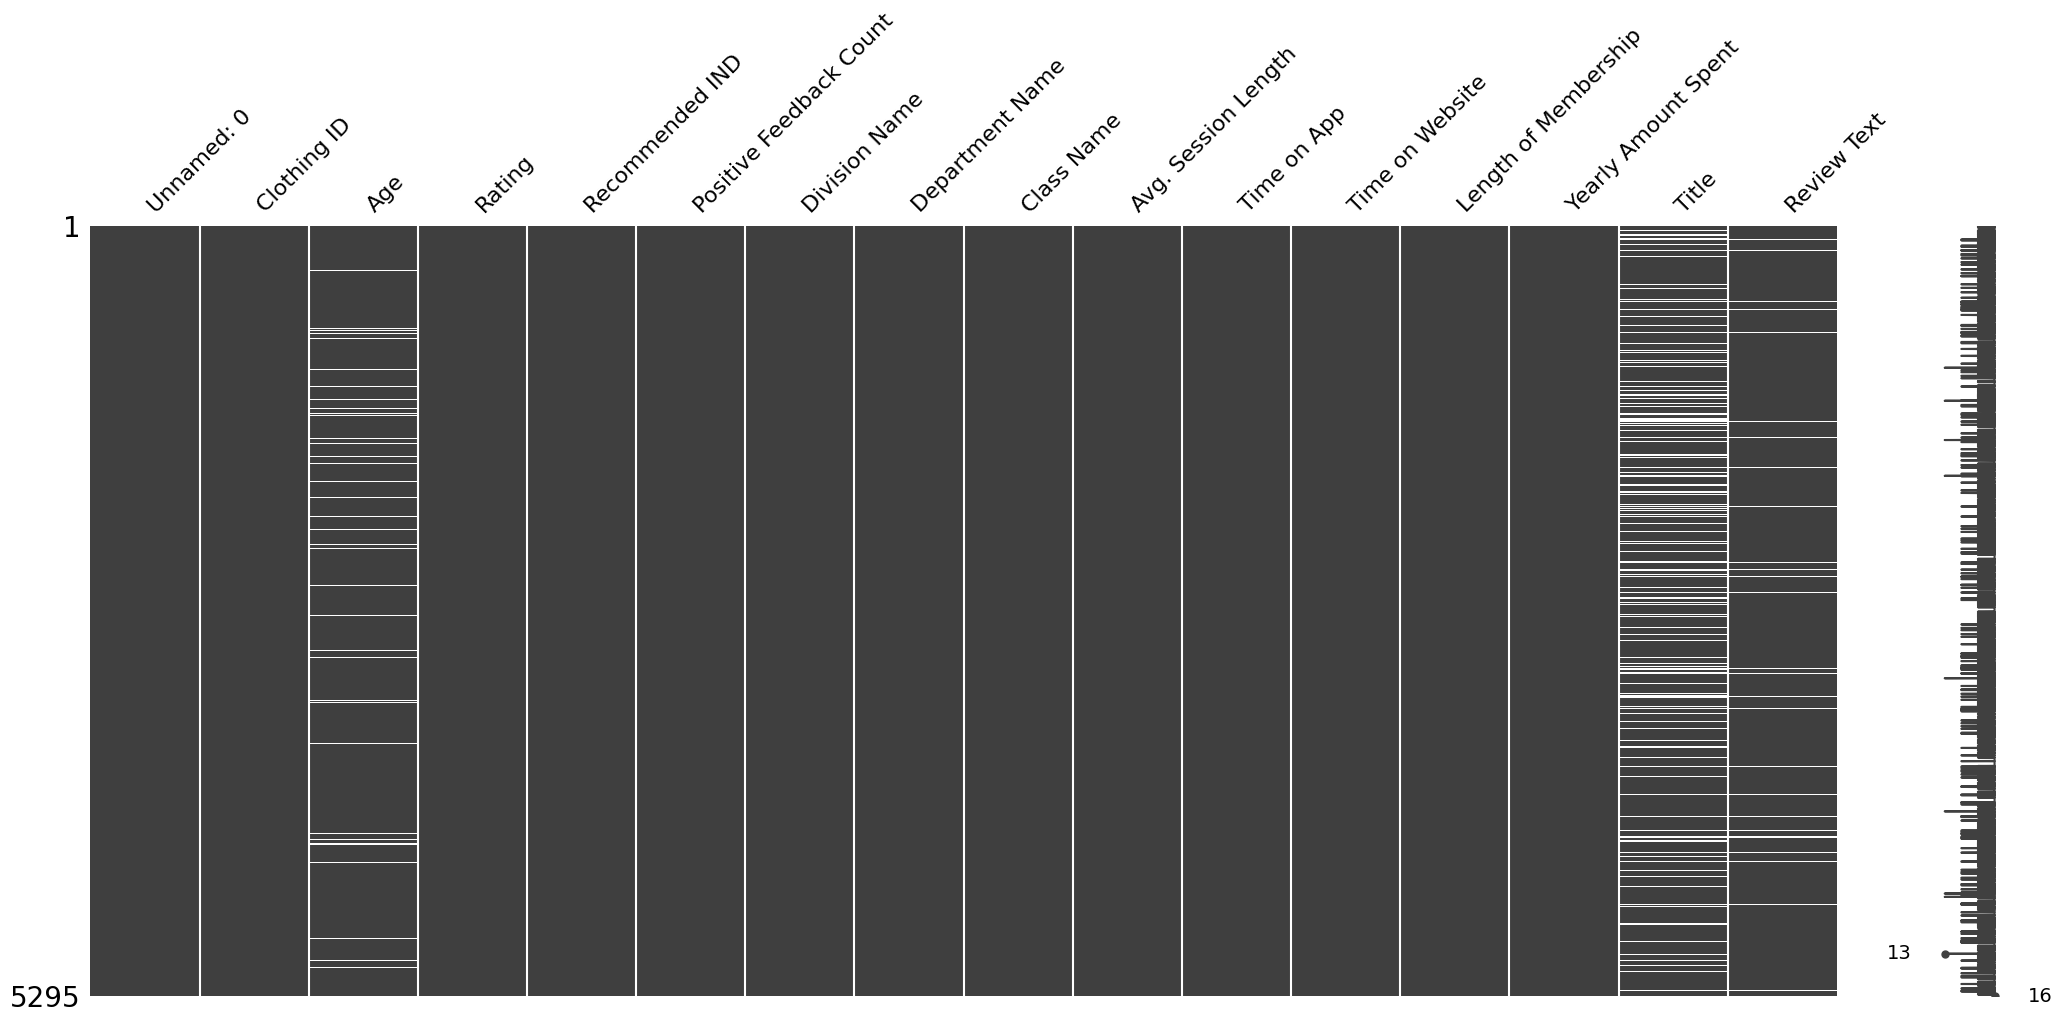

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
df=df.drop(['Unnamed: 0','Class Name','Clothing ID','Title','Review Text','Recommended IND'], axis=1)

In [12]:
df.columns

Index(['Age', 'Rating', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
df.head()

,Age,Rating,Positive Feedback Count,Division Name,Department Name,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,33.0,4,0,Initmates,Intimate,34.49726773,12.655651,39.577668,4.082621,587.951054
1,34.0,5,4,General,Dresses,31.92627203,11.109461,37.268959,2.664034,392.204933
2,60.0,3,0,General,Dresses,33.00091476,11.330278,37.110597,4.104543,487.547505
3,50.0,5,0,General Petite,Bottoms,34.30555663,13.717514,36.721283,3.120179,581.852344
4,47.0,5,6,General,Tops,33.33067252,12.795189,37.536653,4.446308,599.406092


In [14]:
df['Division Name'].value_counts()

General           3125
General Petite    1877
Initmates          293
Name: Division Name, dtype: int64

In [15]:
df['Department Name'].value_counts()

Tops        2421
Dresses     1419
Bottoms      880
Intimate     334
Jackets      202
Trend         39
Name: Department Name, dtype: int64

The above graph depicts that there is no null values in the dataset at all.

<Axes: >

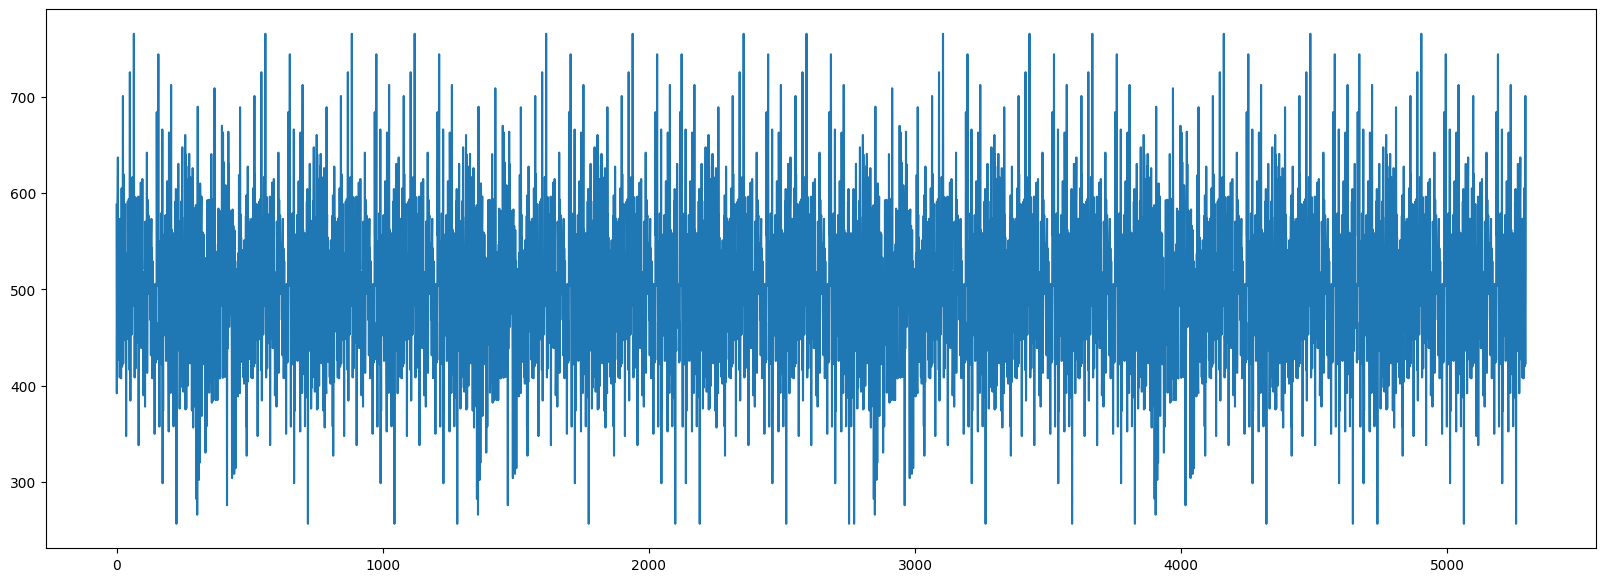

In [16]:
df['Yearly Amount Spent'].plot(kind='line',figsize=(20, 7))

In [17]:
import plotly.express as px
fig = px.box(df, y="Yearly Amount Spent")
fig.show()

In [18]:

fig = px.histogram(df, x='Yearly Amount Spent')
fig.show()

<ipython-input-19-615b06097159>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




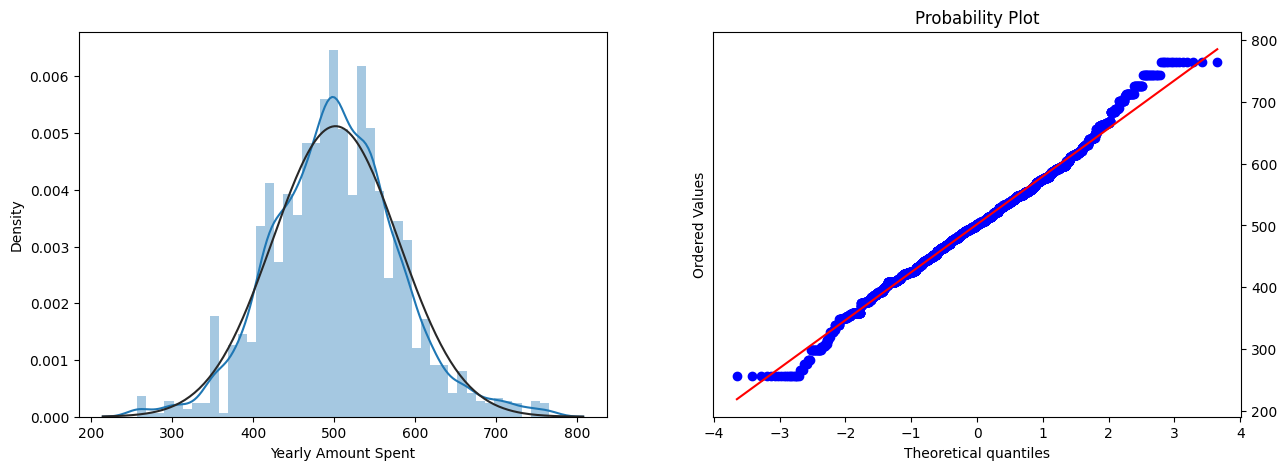

In [19]:
from scipy import stats
from scipy.stats import norm
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sb.distplot(df['Yearly Amount Spent'], fit=norm, ax=ax[0])
stats.probplot(df['Yearly Amount Spent'], plot=plt)
ax[1].yaxis.tick_right()

<ipython-input-20-90b5981ade25>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

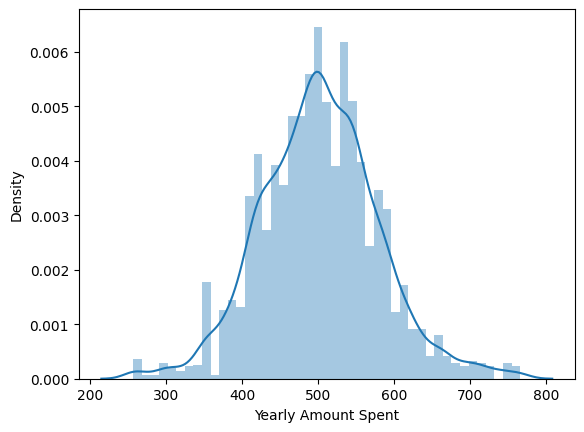

In [20]:
sb.distplot(df['Yearly Amount Spent'])

## The above four graphs shows that the column Yearly Amount Spent is normally distributed which also shows that it does not have outliers.

In [21]:
# sb.pairplot(df)

Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

<ipython-input-22-4329385a7069>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

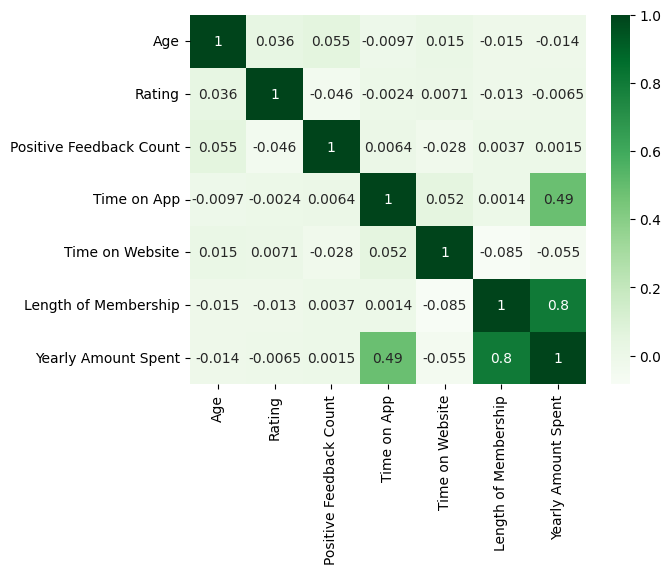

In [22]:
sb.heatmap(df.corr(),annot=True,cmap='Greens')

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation).

In [23]:
df.columns

Index(['Age', 'Rating', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### Dividing Data

Data should be devided into independent as well as dependent variables

In [24]:
x=df.drop(["Yearly Amount Spent",'Division Name'],axis=1)
y=df['Yearly Amount Spent']

### Test Train Set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [27]:
df.columns

Index(['Age', 'Rating', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [28]:
tr1 = ColumnTransformer(transformers=[
    ('missing_age', SimpleImputer(strategy="most_frequent"), [0])
], remainder='passthrough')

In [29]:
tr2 = ColumnTransformer([
    ('One_Div', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [3]),
], remainder="passthrough")

In [30]:
tr3 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0, 9))
])

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression
tr4 = SelectKBest(score_func=f_regression, k=8)

In [32]:
from sklearn.linear_model import LinearRegression
tr5=LinearRegression()

In [33]:
pipe = make_pipeline(tr1, tr2, tr3, tr4, tr5)

In [34]:
X_train

,Age,Rating,Positive Feedback Count,Department Name,Avg. Session Length,Time on App,Time on Website,Length of Membership
2187,51.0,4,0,Tops,33.63662446,11.236507,37.675021,5.254709
4391,44.0,4,0,Dresses,34.85131417,12.415542,37.672322,3.130538
1529,48.0,5,0,Bottoms,33.70088554,13.471578,37.071643,2.379076
1047,50.0,2,13,Tops,32.7273192,13.013376,36.651278,2.367848
4814,42.0,3,0,Tops,34.52301962,11.405770,36.378271,4.041245
...,...,...,...,...,...,...,...,...
4171,55.0,5,27,Bottoms,33.55520742,11.551821,36.628834,2.837943
599,44.0,4,1,Bottoms,33.46869995,13.085506,35.845827,2.926940
1361,69.0,2,7,Dresses,31.91207593,11.792972,36.257819,2.395168
1547,31.0,5,0,Bottoms,33.68093695,11.201570,37.835448,2.208814


In [35]:
# y_train=pd.DataFrame(y_train)
y_train

2187    591.437736
4391    543.132626
1529    492.556834
1047    458.376911
4814    541.049831
           ...    
4171    444.285908
599     497.513683
1361    387.534716
1547    403.819520
4959    514.239521
Name: Yearly Amount Spent, Length: 3706, dtype: float64

In [36]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('missing_age',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_Div',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [3])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 9, None))])),
                ('selectkbest',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x79ad35c6fbe0>)),
                ('linearregression', LinearRegression())])

In [37]:
y_pred=pipe.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6088.084578339026


In [43]:
y_test

316     466.421199
4568    424.185494
4717    712.396327
1416    401.033135
2016    463.923513
           ...    
1933    547.365141
692     560.560161
1938    540.263400
1683    407.804031
2745    420.916159
Name: Yearly Amount Spent, Length: 1589, dtype: float64

In [39]:
accuracy_score(y_test,y_pred)

ValueError: ignored

Applying Standard Scaler to the dataset

In [49]:
X_train=X_train.drop(['Department Name'],axis=1)

In [53]:
X_train=X_train.drop(['Avg. Session Length'],axis=1)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706 entries, 2187 to 4959
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   float64
 1   Rating                   3706 non-null   int64  
 2   Positive Feedback Count  3706 non-null   int64  
 3   Time on App              3706 non-null   float64
 4   Time on Website          3706 non-null   float64
 5   Length of Membership     3706 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 202.7 KB


In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

ValueError: ignored

### Prediction using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

In [ ]:
lm.coef_

### Predict for the test dataset

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
predictions

In [ ]:
y_test.shape

In [ ]:
ax=sb.regplot(x = y_test, y = predictions, ci = None, data = df, scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax.set(xlabel='Y test', ylabel='Predicted Values', title='Linear Regression')

The above graph shows that the model is best linear regression model as most of the datapoints lies around the linear regression line, which means that its a Good fit model.

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

MAE = 7.228 means on average, the forecast's distance from the true value is 7.2228% of the true value

In [ ]:
metrics.mean_squared_error(y_test,predictions)

MSE is 79.813, it generally indicates a relatively low average squared difference between predicted and actual values, suggesting a good performance of the model in terms of minimizing prediction errors.

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

RMSE is 8.9338, it suggests that the average difference between the predicted values and the actual values is relatively small.

In [ ]:
sb.distplot((y_test-predictions),bins=50)

Finally there is a change in the distplots which shows that our model is not 100% accurate in predicting the values.

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe, open('FinalModel.pkl','wb'))